---
## 1. Import Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)

print("✓ Libraries imported successfully!")
print("\n🚀 Advanced Linear Regression Model")
print("   Goal: Improve on baseline (Kaggle: 0.92918)")

✓ Libraries imported successfully!

🚀 Advanced Linear Regression Model
   Goal: Improve on baseline (Kaggle: 0.92918)


---
## 2. Load Pre-Split Data

In [49]:
# Load pre-split datasets
data_path = '/workspaces/Room_7_Bakery_Prediction/0_DataPreparation/0.6 Merge with test dataset and split/'

train_data = pd.read_csv(data_path + 'train_data.csv')
val_data = pd.read_csv(data_path + 'val_data.csv')
test_data = pd.read_csv(data_path + 'test_data.csv')

# Convert date columns
train_data['date'] = pd.to_datetime(train_data['date'])
val_data['date'] = pd.to_datetime(val_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

print("="*80)
print("DATA LOADED")
print("="*80)
print(f"\n📊 TRAINING SET:")
print(f"   Shape: {train_data.shape[0]:,} rows × {train_data.shape[1]} columns")
print(f"   Date range: {train_data['date'].min().date()} to {train_data['date'].max().date()}")

print(f"\n📊 VALIDATION SET:")
print(f"   Shape: {val_data.shape[0]:,} rows × {val_data.shape[1]} columns")
print(f"   Date range: {val_data['date'].min().date()} to {val_data['date'].max().date()}")

print(f"\n📊 TEST SET:")
print(f"   Shape: {test_data.shape[0]:,} rows × {test_data.shape[1]} columns")
print(f"   Date range: {test_data['date'].min().date()} to {test_data['date'].max().date()}")

train_data.head()

DATA LOADED

📊 TRAINING SET:
   Shape: 7,493 rows × 50 columns
   Date range: 2013-07-01 to 2017-07-31

📊 VALIDATION SET:
   Shape: 1,841 rows × 50 columns
   Date range: 2017-08-01 to 2018-07-31

📊 TEST SET:
   Shape: 1,830 rows × 50 columns
   Date range: 2018-08-01 to 2019-07-30


,id,date,Warengruppe,umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Is_Holiday,Day_Before_Holiday,Day_After_Holiday,Is_Vacation,Vacation_Type,day_of_the_week,month,is_weekend,days_to_weekend,bewoelkung_category,wettercode_category,season,temperature_category,temp_change_1d,temp_trend_3d,umsatz_ma7,umsatz_ma14,umsatz_volatility_7d,umsatz_sum_7d,umsatz_lag1,umsatz_lag7,umsatz_pct_change,umsatz_pct_change_lag1,season_numeric,is_weekend_int,weekend_season_interaction,weekend_season_category,holiday_temp_interaction,holiday_temp_category,day_before_holiday_int,day_before_holiday_weekend_interaction,day_before_holiday_weekend_category,KielerWoche_binary,kielerweek_temp_interaction,kielerweek_temp_category,temp_season_interaction,temp_season_category,weekend_temp_interaction,weekend_temp_category,bewoelkung_weekend_interaction,bewoelkung_weekend_category
0,1307011.0,2013-07-01,1.0,148.828353,NaN,6.0,17.8375,15.0,20.0,0.0,0.0,0.0,1.0,Summer,0.0,7.0,False,5.0,Very cloudy,Drizzle (not freezing) or snow grains,Summer,Medium,NaN,NaN,148.828353,148.828353,NaN,148.828353,NaN,NaN,NaN,NaN,3.0,0.0,0.0,Weekday_Summer,0.0,No_Holiday,0.0,0.0,Regular_Day,0.0,0.0,No_KielerWoche,9.0,Medium_Summer,0.0,Weekday_Medium,0.0,Weekday_Very cloudy
1,1307012.0,2013-07-01,2.0,535.856285,NaN,6.0,17.8375,15.0,20.0,0.0,0.0,0.0,1.0,Summer,0.0,7.0,False,5.0,Very cloudy,Drizzle (not freezing) or snow grains,Summer,Medium,0.0,NaN,342.342319,342.342319,273.670075,684.684638,148.828353,NaN,2.600499,NaN,3.0,0.0,0.0,Weekday_Summer,0.0,No_Holiday,0.0,0.0,Regular_Day,0.0,0.0,No_KielerWoche,9.0,Medium_Summer,0.0,Weekday_Medium,0.0,Weekday_Very cloudy
2,1307013.0,2013-07-01,3.0,201.198426,NaN,6.0,17.8375,15.0,20.0,0.0,0.0,0.0,1.0,Summer,0.0,7.0,False,5.0,Very cloudy,Drizzle (not freezing) or snow grains,Summer,Medium,0.0,NaN,295.294355,295.294355,209.971874,885.883064,535.856285,NaN,-0.624529,2.600499,3.0,0.0,0.0,Weekday_Summer,0.0,No_Holiday,0.0,0.0,Regular_Day,0.0,0.0,No_KielerWoche,9.0,Medium_Summer,0.0,Weekday_Medium,0.0,Weekday_Very cloudy
3,1307014.0,2013-07-01,4.0,65.890169,NaN,6.0,17.8375,15.0,20.0,0.0,0.0,0.0,1.0,Summer,0.0,7.0,False,5.0,Very cloudy,Drizzle (not freezing) or snow grains,Summer,Medium,0.0,0.0,237.943308,237.943308,206.273351,951.773232,201.198426,NaN,-0.672512,-0.624529,3.0,0.0,0.0,Weekday_Summer,0.0,No_Holiday,0.0,0.0,Regular_Day,0.0,0.0,No_KielerWoche,9.0,Medium_Summer,0.0,Weekday_Medium,0.0,Weekday_Very cloudy
4,1307015.0,2013-07-01,5.0,317.475875,NaN,6.0,17.8375,15.0,20.0,0.0,0.0,0.0,1.0,Summer,0.0,7.0,False,5.0,Very cloudy,Drizzle (not freezing) or snow grains,Summer,Medium,0.0,0.0,253.849821,253.849821,182.144468,1269.249107,65.890169,NaN,3.818259,-0.672512,3.0,0.0,0.0,Weekday_Summer,0.0,No_Holiday,0.0,0.0,Regular_Day,0.0,0.0,No_KielerWoche,9.0,Medium_Summer,0.0,Weekday_Medium,0.0,Weekday_Very cloudy


---
## 3. Data Cleaning & Preparation

Using the same proven cleaning approach from the baseline model.

In [50]:
print("Preparing data...\n")

# Combine train and val for cleaning
df_with_sales = pd.concat([train_data, val_data], ignore_index=True)
df_without_sales = test_data.copy()

print(f"Training + Validation data: {len(df_with_sales):,} rows")
print(f"Test data: {len(df_without_sales):,} rows")

# Drop lag features (prevent data leakage)
lag_cols = [col for col in df_with_sales.columns if any(x in col.lower() for x in ['lag', '_ma', 'volatility', 'pct_change', 'sum_7d'])]
if 'id' in df_with_sales.columns:
    lag_cols.append('id')

print(f"\nDropping {len(lag_cols)} lag features to prevent data leakage")

df_with_sales = df_with_sales.drop(columns=lag_cols, errors='ignore')
df_without_sales = df_without_sales.drop(columns=lag_cols, errors='ignore')

# === Time-aware imputation (uses only past info, no future peeking) ===
print("\nApplying time-aware imputation for weather features...")

# Ensure month column exists for fallback
if 'month' not in df_with_sales.columns:
    df_with_sales['month'] = df_with_sales['date'].dt.month
if 'month' not in df_without_sales.columns:
    df_without_sales['month'] = df_without_sales['date'].dt.month

# Identify weather columns
numeric_weather_cols = [c for c in ['Temperatur', 'Niederschlag', 'Windgeschwindigkeit', 
                                     'Luftdruck', 'Luftfeuchte', 'Sonnenscheindauer', 'Bewoelkung'] 
                        if c in df_with_sales.columns]
has_wettercode_cat = 'wettercode_category' in df_with_sales.columns
has_wettercode_num = 'Wettercode' in df_with_sales.columns

# Helper: sort by Warengruppe + date for proper time order
group_col = 'Warengruppe' if 'Warengruppe' in df_with_sales.columns else None

def sort_temporal(df_):
    if group_col and group_col in df_.columns:
        return df_.sort_values([group_col, 'date'])
    return df_.sort_values('date')

def ffill_by_group(df_, col):
    if group_col and group_col in df_.columns:
        df_[col] = df_.groupby(group_col, observed=True)[col].ffill()
    else:
        df_[col] = df_[col].ffill()

# Sort both dataframes
df_with_sales = sort_temporal(df_with_sales)
df_without_sales = sort_temporal(df_without_sales)

# 1) Numeric weather: forward fill, then per-month median fallback (computed on training data)
for col in numeric_weather_cols:
    # Ensure numeric
    df_with_sales[col] = pd.to_numeric(df_with_sales[col], errors='coerce')
    df_without_sales[col] = pd.to_numeric(df_without_sales[col], errors='coerce')
    
    # Forward fill by group
    ffill_by_group(df_with_sales, col)
    ffill_by_group(df_without_sales, col)
    
    # Month-based fallback using training data statistics
    month_medians = df_with_sales.groupby('month')[col].median()
    global_median = df_with_sales[col].median()
    
    for df_ in [df_with_sales, df_without_sales]:
        missing = df_[col].isna()
        if missing.any():
            df_.loc[missing, col] = df_.loc[missing, 'month'].map(month_medians)
            still_missing = df_[col].isna()
            if still_missing.any():
                df_.loc[still_missing, col] = global_median
    
    # Special: Bewoelkung is Okta (0-9), round and clip
    if col == 'Bewoelkung':
        df_with_sales[col] = np.round(df_with_sales[col]).clip(0, 9)
        df_without_sales[col] = np.round(df_without_sales[col]).clip(0, 9)
        # Convert to int if no NaNs left
        if df_with_sales[col].isna().sum() == 0:
            df_with_sales[col] = df_with_sales[col].astype(int)
        if df_without_sales[col].isna().sum() == 0:
            df_without_sales[col] = df_without_sales[col].astype(int)

# 2) Wettercode: handle numeric and categorical in sync
if has_wettercode_num or has_wettercode_cat:
    # WMO code mapping
    wmo_map = {
        0.0: "Cloud development not observed or not observable",
        3.0: "Clouds generally forming or developing",
        5.0: "Haze",
        10.0: "Mist",
        17.0: "Thunderstorm, no precipitation at observation",
        20.0: "Drizzle (not freezing) or snow grains",
        21.0: "Rain (not freezing)",
        22.0: "Snow",
        28.0: "Fog or ice fog",
        45.0: "Fog or ice fog, sky invisible",
        49.0: "Fog, depositing rime, sky invisible",
        53.0: "Moderate drizzle, not freezing, continuous",
        55.0: "Heavy drizzle, not freezing, continuous",
        61.0: "Slight rain, not freezing, intermittent",
        63.0: "Moderate rain, not freezing, continuous",
        65.0: "Heavy rain, not freezing, continuous",
        68.0: "Rain or drizzle and snow, slight",
        69.0: "Rain or drizzle and snow, moderate or heavy",
        71.0: "Slight continuous fall of snowflakes",
        73.0: "Moderate continuous fall of snowflakes",
        75.0: "Heavy continuous fall of snowflakes",
        77.0: "Snow grains (with or without fog)",
        79.0: "Ice pellets",
        95.0: "Thunderstorm, slight/moderate, no hail but rain/snow"
    }
    
    # Ensure numeric
    df_with_sales['Wettercode'] = pd.to_numeric(df_with_sales['Wettercode'], errors='coerce')
    df_without_sales['Wettercode'] = pd.to_numeric(df_without_sales['Wettercode'], errors='coerce')
    
    # Forward fill by group
    ffill_by_group(df_with_sales, 'Wettercode')
    ffill_by_group(df_without_sales, 'Wettercode')
    
    # Month mode fallback (using only observed values)
    month_modes = df_with_sales.groupby('month')['Wettercode'].apply(
        lambda x: x.dropna().mode().iloc[0] if len(x.dropna().mode()) > 0 else None
    )
    global_mode = df_with_sales['Wettercode'].dropna().mode()
    global_mode = global_mode.iloc[0] if len(global_mode) > 0 else 0.0  # Default to clear sky instead of rain
    
    for df_ in [df_with_sales, df_without_sales]:
        missing = df_['Wettercode'].isna()
        if missing.any():
            df_.loc[missing, 'Wettercode'] = df_.loc[missing, 'month'].map(month_modes)
            still_missing = df_['Wettercode'].isna()
            if still_missing.any():
                df_.loc[still_missing, 'Wettercode'] = global_mode
    
    # NOW sync wettercode_category from the (possibly filled) Wettercode
    df_with_sales['wettercode_category'] = df_with_sales['Wettercode'].map(wmo_map)
    df_without_sales['wettercode_category'] = df_without_sales['Wettercode'].map(wmo_map)
    
    # Fill any still-missing categories with 'Unknown'
    df_with_sales['wettercode_category'].fillna('Unknown', inplace=True)
    df_without_sales['wettercode_category'].fillna('Unknown', inplace=True)
    
    print(f"  ✓ Wettercode filled and synced to wettercode_category")
    print(f"    Train Wettercode NaNs: {df_with_sales['Wettercode'].isna().sum()}")
    print(f"    Train wettercode_category NaNs: {df_with_sales['wettercode_category'].isna().sum()}")

# 3) Fill remaining non-weather columns with simpler logic
for col in df_with_sales.columns:
    # Check if EITHER dataset has missing values
    has_missing = df_with_sales[col].isnull().sum() > 0 or df_without_sales[col].isnull().sum() > 0
    
    if has_missing:
        # Skip if already handled above
        if col in numeric_weather_cols or col in ['wettercode_category', 'Wettercode', 'date', 'month']:
            continue
        
        if df_with_sales[col].dtype in ['float64', 'int64']:
            fill_val = df_with_sales[col].median()
            df_with_sales[col].fillna(fill_val, inplace=True)
            df_without_sales[col].fillna(fill_val, inplace=True)
        else:
            fill_val = 'Unknown'
            df_with_sales[col].fillna(fill_val, inplace=True)
            df_without_sales[col].fillna(fill_val, inplace=True)

# Report
print(f"  ✓ Weather columns filled with forward-fill + month-based fallback")
print(f"  ✓ Bewoelkung treated as Okta (0-9)")
print(f"  ✓ Remaining columns filled with median/Unknown")

# Show remaining NaNs
train_nans = df_with_sales.isnull().sum().sum()
test_nans = df_without_sales.isnull().sum().sum()
print(f"\nRemaining NaNs -> Training: {train_nans}, Test: {test_nans}")

print(f"✓ Data cleaned!")

Preparing data...

Training + Validation data: 9,334 rows
Test data: 1,830 rows

Dropping 9 lag features to prevent data leakage

Applying time-aware imputation for weather features...
  ✓ Wettercode filled and synced to wettercode_category
    Train Wettercode NaNs: 0
    Train wettercode_category NaNs: 0
  ✓ Weather columns filled with forward-fill + month-based fallback
  ✓ Bewoelkung treated as Okta (0-9)
  ✓ Remaining columns filled with median/Unknown

Remaining NaNs -> Training: 0, Test: 1830
✓ Data cleaned!


---
## 4. Split Data

In [51]:
# Re-split after cleaning
train_data = df_with_sales[df_with_sales['date'] < '2017-08-01'].copy()
val_data = df_with_sales[df_with_sales['date'] >= '2017-08-01'].copy()
test_data = df_without_sales.copy()

print("="*80)
print("DATA SPLITS")
print("="*80)
print(f"\n  Training:   {len(train_data):,} rows | {train_data['date'].min().date()} to {train_data['date'].max().date()}")
print(f"  Validation: {len(val_data):,} rows | {val_data['date'].min().date()} to {val_data['date'].max().date()}")
print(f"  Test:       {len(test_data):,} rows | {test_data['date'].min().date()} to {test_data['date'].max().date()}")

DATA SPLITS

  Training:   7,493 rows | 2013-07-01 to 2017-07-31
  Validation: 1,841 rows | 2017-08-01 to 2018-07-31
  Test:       1,830 rows | 2018-08-01 to 2019-07-30


---
## 5. Feature Strategy Selection

We'll try different feature sets:
- **Baseline**: The 57 features that scored 0.92918
- **Extended**: Add more interaction features
- **Selected**: Use feature selection to find optimal subset

In [52]:
print("\n" + "="*80)
print("FEATURE ENGINEERING STRATEGY")
print("="*80 + "\n")

# Start with baseline features (proven successful)
core_numeric = [
    'Temperatur',
    'Bewoelkung',
    'Niederschlag',
    'Luftdruck'
]

core_categorical = [
    'Warengruppe',
    'day_of_the_week',
    'month',
    'is_weekend',
    'Is_Holiday',
    'Day_Before_Holiday',
    'KielerWoche',
    'wettercode_category',
    'season',
    'temperature_category'
]

# Check which features exist
core_numeric = [c for c in core_numeric if c in train_data.columns]
core_categorical = [c for c in core_categorical if c in train_data.columns]

print(f"✓ Core Numeric Features ({len(core_numeric)}): {core_numeric}")
print(f"✓ Core Categorical Features ({len(core_categorical)}): {core_categorical}")

# Create feature subsets
core_cols = core_numeric + core_categorical + ['umsatz', 'date']

train_subset = train_data[[c for c in core_cols if c in train_data.columns]].copy()
val_subset = val_data[[c for c in core_cols if c in val_data.columns]].copy()
test_subset = test_data[[c for c in core_cols if c in test_data.columns]].copy()

print(f"\n✓ Subset created: {train_subset.shape[1]-2} features + target")


FEATURE ENGINEERING STRATEGY

✓ Core Numeric Features (2): ['Temperatur', 'Bewoelkung']
✓ Core Categorical Features (10): ['Warengruppe', 'day_of_the_week', 'month', 'is_weekend', 'Is_Holiday', 'Day_Before_Holiday', 'KielerWoche', 'wettercode_category', 'season', 'temperature_category']

✓ Subset created: 12 features + target


---
## 6. Encode Features

In [53]:
print("\nEncoding features...")

# One-hot encode categorical features
exclude_cols = ['date', 'umsatz']
categorical_cols = [c for c in core_categorical if c in train_subset.columns]

print(f"  Categorical columns to encode: {len(categorical_cols)}")

all_data = pd.concat([train_subset, val_subset, test_subset], ignore_index=True)
all_encoded = pd.get_dummies(all_data, columns=categorical_cols, drop_first=True, dtype=int)

# Split back
train_encoded = all_encoded.iloc[:len(train_subset)].copy()
val_encoded = all_encoded.iloc[len(train_subset):len(train_subset)+len(val_subset)].copy()
test_encoded = all_encoded.iloc[len(train_subset)+len(val_subset):].copy()

# Create feature matrices
feature_cols = [col for col in train_encoded.columns if col not in exclude_cols]

X_train = train_encoded[feature_cols]
X_val = val_encoded[feature_cols]
X_test = test_encoded[feature_cols]

y_train = train_encoded['umsatz']
y_val = val_encoded['umsatz']

# Fill any remaining NaNs
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)
X_test = X_test.fillna(0)

print(f"\n✓ Feature matrices created:")
print(f"  X_train: {X_train.shape}")
print(f"  X_val:   {X_val.shape}")
print(f"  X_test:  {X_test.shape}")


Encoding features...
  Categorical columns to encode: 10

✓ Feature matrices created:
  X_train: (7493, 59)
  X_val:   (1841, 59)
  X_test:  (1830, 59)


---
## 7. Baseline Model (for comparison)

In [54]:
def calculate_mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    return mape

def adjusted_r2(r2, n_samples, n_features):
    """Calculate Adjusted R²"""
    adj_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)
    return adj_r2

print("="*80)
print("BASELINE: Standard Linear Regression")
print("="*80)

# Train baseline
lr_baseline = LinearRegression()
lr_baseline.fit(X_train, y_train)

# Predictions
y_val_pred_baseline = lr_baseline.predict(X_val)

# Metrics
val_mape_baseline = calculate_mape(y_val, y_val_pred_baseline)
val_r2_baseline = r2_score(y_val, y_val_pred_baseline)
val_mae_baseline = mean_absolute_error(y_val, y_val_pred_baseline)
val_rmse_baseline = np.sqrt(mean_squared_error(y_val, y_val_pred_baseline))

print(f"\n📊 Validation Results:")
print(f"   MAPE:  {val_mape_baseline:.2f}%")
print(f"   R²:    {val_r2_baseline:.4f}")
print(f"   MAE:   €{val_mae_baseline:.2f}")
print(f"   RMSE:  €{val_rmse_baseline:.2f}")
print(f"\n✓ Baseline established (Kaggle reference: 0.92918)")

BASELINE: Standard Linear Regression

📊 Validation Results:
   MAPE:  32.76%
   R²:    0.7139
   MAE:   €49.55
   RMSE:  €69.58

✓ Baseline established (Kaggle reference: 0.92918)


---
## 8. Improvement Strategy 1: Ridge Regression (L2 Regularization)

Ridge regression adds L2 penalty to prevent overfitting and handle multicollinearity.

In [55]:
print("="*80)
print("STRATEGY 1: Ridge Regression (L2 Regularization)")
print("="*80)

# Standardize features (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Grid search for best alpha
alphas = [0.01, 0.1, 1, 10, 100, 1000]
best_score = -np.inf
best_alpha = None

print(f"\nTesting alpha values: {alphas}")

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_val_pred = ridge.predict(X_val_scaled)
    score = r2_score(y_val, y_val_pred)
    
    if score > best_score:
        best_score = score
        best_alpha = alpha
    
    print(f"  α={alpha:6.2f}: R² = {score:.4f}")

# Train with best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_scaled, y_train)
y_val_pred_ridge = ridge_best.predict(X_val_scaled)

# Metrics
val_mape_ridge = calculate_mape(y_val, y_val_pred_ridge)
val_r2_ridge = r2_score(y_val, y_val_pred_ridge)
val_mae_ridge = mean_absolute_error(y_val, y_val_pred_ridge)

print(f"\n🏆 Best Ridge Model (α={best_alpha}):")
print(f"   MAPE:  {val_mape_ridge:.2f}% (baseline: {val_mape_baseline:.2f}%)")
print(f"   R²:    {val_r2_ridge:.4f} (baseline: {val_r2_baseline:.4f})")
print(f"   MAE:   €{val_mae_ridge:.2f} (baseline: €{val_mae_baseline:.2f})")

improvement = ((val_r2_ridge - val_r2_baseline) / val_r2_baseline) * 100
print(f"\n{'✅' if improvement > 0 else '❌'} R² change: {improvement:+.2f}%")

STRATEGY 1: Ridge Regression (L2 Regularization)

Testing alpha values: [0.01, 0.1, 1, 10, 100, 1000]
  α=  0.01: R² = 0.7139
  α=  0.10: R² = 0.7139
  α=  1.00: R² = 0.7139
  α= 10.00: R² = 0.7143
  α=100.00: R² = 0.7180
  α=1000.00: R² = 0.7272

🏆 Best Ridge Model (α=1000):
   MAPE:  32.39% (baseline: 32.76%)
   R²:    0.7272 (baseline: 0.7139)
   MAE:   €47.06 (baseline: €49.55)

✅ R² change: +1.87%


---
## 9. Improvement Strategy 2: Lasso Regression (L1 Regularization)

Lasso performs feature selection by shrinking less important coefficients to zero.

In [56]:
print("="*80)
print("STRATEGY 2: Lasso Regression (L1 Regularization + Feature Selection)")
print("="*80)

# Grid search for best alpha
alphas = [0.01, 0.1, 1, 10, 50]
best_score = -np.inf
best_alpha = None

print(f"\nTesting alpha values: {alphas}")

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    y_val_pred = lasso.predict(X_val_scaled)
    score = r2_score(y_val, y_val_pred)
    
    # Count non-zero coefficients
    n_features = np.sum(lasso.coef_ != 0)
    
    if score > best_score:
        best_score = score
        best_alpha = alpha
    
    print(f"  α={alpha:6.2f}: R² = {score:.4f} | Features selected: {n_features}/{len(feature_cols)}")

# Train with best alpha
lasso_best = Lasso(alpha=best_alpha, max_iter=10000)
lasso_best.fit(X_train_scaled, y_train)
y_val_pred_lasso = lasso_best.predict(X_val_scaled)

# Metrics
val_mape_lasso = calculate_mape(y_val, y_val_pred_lasso)
val_r2_lasso = r2_score(y_val, y_val_pred_lasso)
val_mae_lasso = mean_absolute_error(y_val, y_val_pred_lasso)

n_selected = np.sum(lasso_best.coef_ != 0)

print(f"\n🏆 Best Lasso Model (α={best_alpha}):")
print(f"   MAPE:  {val_mape_lasso:.2f}% (baseline: {val_mape_baseline:.2f}%)")
print(f"   R²:    {val_r2_lasso:.4f} (baseline: {val_r2_baseline:.4f})")
print(f"   MAE:   €{val_mae_lasso:.2f} (baseline: €{val_mae_baseline:.2f})")
print(f"   Features: {n_selected}/{len(feature_cols)} selected")

improvement = ((val_r2_lasso - val_r2_baseline) / val_r2_baseline) * 100
print(f"\n{'✅' if improvement > 0 else '❌'} R² change: {improvement:+.2f}%")

STRATEGY 2: Lasso Regression (L1 Regularization + Feature Selection)

Testing alpha values: [0.01, 0.1, 1, 10, 50]
  α=  0.01: R² = 0.7140 | Features selected: 51/59
  α=  0.10: R² = 0.7148 | Features selected: 48/59
  α=  1.00: R² = 0.7189 | Features selected: 33/59
  α= 10.00: R² = 0.6989 | Features selected: 8/59
  α= 50.00: R² = 0.3399 | Features selected: 1/59

🏆 Best Lasso Model (α=1):
   MAPE:  31.96% (baseline: 32.76%)
   R²:    0.7189 (baseline: 0.7139)
   MAE:   €48.39 (baseline: €49.55)
   Features: 33/59 selected

✅ R² change: +0.70%


---
## 10. Improvement Strategy 3: ElasticNet (L1 + L2)

ElasticNet combines Ridge and Lasso for balanced regularization.

In [57]:
print("="*80)
print("STRATEGY 3: ElasticNet (L1 + L2 Regularization)")
print("="*80)

# Grid search
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

best_score = -np.inf
best_params = None

print(f"\nTesting combinations...")

for alpha in param_grid['alpha']:
    for l1_ratio in param_grid['l1_ratio']:
        enet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        enet.fit(X_train_scaled, y_train)
        y_val_pred = enet.predict(X_val_scaled)
        score = r2_score(y_val, y_val_pred)
        
        if score > best_score:
            best_score = score
            best_params = {'alpha': alpha, 'l1_ratio': l1_ratio}

print(f"\n🎯 Best parameters: α={best_params['alpha']}, l1_ratio={best_params['l1_ratio']}")

# Train with best params
enet_best = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'], max_iter=10000)
enet_best.fit(X_train_scaled, y_train)
y_val_pred_enet = enet_best.predict(X_val_scaled)

# Metrics
val_mape_enet = calculate_mape(y_val, y_val_pred_enet)
val_r2_enet = r2_score(y_val, y_val_pred_enet)
val_mae_enet = mean_absolute_error(y_val, y_val_pred_enet)

print(f"\n🏆 Best ElasticNet Model:")
print(f"   MAPE:  {val_mape_enet:.2f}% (baseline: {val_mape_baseline:.2f}%)")
print(f"   R²:    {val_r2_enet:.4f} (baseline: {val_r2_baseline:.4f})")
print(f"   MAE:   €{val_mae_enet:.2f} (baseline: €{val_mae_baseline:.2f})")

improvement = ((val_r2_enet - val_r2_baseline) / val_r2_baseline) * 100
print(f"\n{'✅' if improvement > 0 else '❌'} R² change: {improvement:+.2f}%")

STRATEGY 3: ElasticNet (L1 + L2 Regularization)

Testing combinations...

🎯 Best parameters: α=1, l1_ratio=0.9

🏆 Best ElasticNet Model:
   MAPE:  31.93% (baseline: 32.76%)
   R²:    0.7278 (baseline: 0.7139)
   MAE:   €46.77 (baseline: €49.55)

✅ R² change: +1.96%


---
## 11. Model Comparison

In [58]:
print("="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)

results = pd.DataFrame({
    'Model': ['Baseline (LR)', 'Ridge', 'Lasso', 'ElasticNet'],
    'MAPE (%)': [val_mape_baseline, val_mape_ridge, val_mape_lasso, val_mape_enet],
    'R²': [val_r2_baseline, val_r2_ridge, val_r2_lasso, val_r2_enet],
    'MAE (€)': [val_mae_baseline, val_mae_ridge, val_mae_lasso, val_mae_enet]
})

results = results.sort_values('R²', ascending=False)

print("\n" + results.to_string(index=False))

best_model_name = results.iloc[0]['Model']
best_r2 = results.iloc[0]['R²']

print(f"\n🏆 WINNER: {best_model_name} (R² = {best_r2:.4f})")
print(f"\n📊 Reference: Simplified Baseline scored 0.92918 on Kaggle")

MODEL COMPARISON SUMMARY

        Model  MAPE (%)       R²   MAE (€)
   ElasticNet 31.926563 0.727837 46.773879
        Ridge 32.385945 0.727195 47.062032
        Lasso 31.956728 0.718860 48.392556
Baseline (LR) 32.759001 0.713880 49.550300

🏆 WINNER: ElasticNet (R² = 0.7278)

📊 Reference: Simplified Baseline scored 0.92918 on Kaggle


---
## 12. Select Best Model & Generate Predictions

In [59]:
print("="*80)
print("FINAL MODEL SELECTION")
print("="*80)

# Select best model based on R²
models = {
    'Baseline (LR)': (lr_baseline, False),  # (model, needs_scaling)
    'Ridge': (ridge_best, True),
    'Lasso': (lasso_best, True),
    'ElasticNet': (enet_best, True)
}

best_idx = results['R²'].idxmax()
best_model_name = results.loc[best_idx, 'Model']
best_model, needs_scaling = models[best_model_name]

print(f"\n🎯 Selected Model: {best_model_name}")
print(f"   Validation R²: {results.loc[best_idx, 'R²']:.4f}")
print(f"   Validation MAPE: {results.loc[best_idx, 'MAPE (%)']:.2f}%")

# Generate test predictions
if needs_scaling:
    X_test_scaled = scaler.transform(X_test)
    test_predictions = best_model.predict(X_test_scaled)
else:
    test_predictions = best_model.predict(X_test)

# Load test_data.csv to get correct IDs
test_with_ids = pd.read_csv('/workspaces/Room_7_Bakery_Prediction/0_DataPreparation/0.6 Merge with test dataset and split/test_data.csv')

# Create Kaggle submission
submission = pd.DataFrame({
    'id': test_with_ids['id'].values,
    'umsatz': test_predictions
})

print(f"\n📊 Test Predictions:")
print(f"   Total: {len(submission):,}")
print(f"   Mean: €{submission['umsatz'].mean():.2f}")
print(f"   Min:  €{submission['umsatz'].min():.2f}")
print(f"   Max:  €{submission['umsatz'].max():.2f}")

print(f"\nFirst 10 predictions:")
print(submission.head(10))

# Save
submission.to_csv('advanced_lr_predictions.csv', index=False)
print(f"\n✓ Saved to: advanced_lr_predictions.csv")

FINAL MODEL SELECTION

🎯 Selected Model: ElasticNet
   Validation R²: 0.7278
   Validation MAPE: 31.93%

📊 Test Predictions:
   Total: 1,830
   Mean: €190.34
   Min:  €48.67
   Max:  €394.67

First 10 predictions:
          id      umsatz
0  1808011.0  144.100861
1  1808012.0  146.763676
2  1808013.0  147.907862
3  1808015.0  143.708847
4  1808014.0  138.068618
5  1808022.0  143.373391
6  1808023.0  153.883470
7  1808024.0  147.016777
8  1808025.0  142.615719
9  1808021.0  134.654726

✓ Saved to: advanced_lr_predictions.csv


---
## 13. Next Steps & Recommendations

### If results improved:
1. ✅ Submit to Kaggle and compare with baseline (0.92918)
2. 🔄 Try polynomial features for non-linear relationships
3. 🎯 Feature engineering: create interaction terms
4. 📊 Ensemble: combine multiple models

### If results didn't improve:
1. 🔍 The baseline features may already be optimal
2. 💡 Try adding domain-specific features
3. 🌡️ Weather interactions with product type
4. 📅 More sophisticated time features

In [60]:
print("="*80)
print("🎉 ADVANCED LINEAR REGRESSION MODEL COMPLETE!")
print("="*80)

print(f"\n📈 Summary:")
print(f"   Best Model: {best_model_name}")
print(f"   Validation R²: {results.loc[best_idx, 'R²']:.4f}")
print(f"   Baseline Reference: 0.92918 (Kaggle)")

print(f"\n🎯 Next Action: Submit advanced_lr_predictions.csv to Kaggle!")

🎉 ADVANCED LINEAR REGRESSION MODEL COMPLETE!

📈 Summary:
   Best Model: ElasticNet
   Validation R²: 0.7278
   Baseline Reference: 0.92918 (Kaggle)

🎯 Next Action: Submit advanced_lr_predictions.csv to Kaggle!


---
## 14. Alternative Strategy: Feature Interactions

**Kaggle Result: Regularization got 0.89738 (worse than baseline 0.92918)**

Since regularization hurt performance, the baseline isn't overfitting. Let's try feature interactions instead.

In [61]:
print("="*80)
print("STRATEGY: Feature Interactions")
print("="*80)

# Go back to original cleaned data (before encoding)
train_interact = train_data[[c for c in core_numeric + core_categorical + ['umsatz', 'date'] if c in train_data.columns]].copy()
val_interact = val_data[[c for c in core_numeric + core_categorical + ['umsatz', 'date'] if c in val_data.columns]].copy()
test_interact = test_data[[c for c in core_numeric + core_categorical + ['umsatz', 'date'] if c in test_data.columns]].copy()

print(f"\nCreating interaction features...")

# Function to add interactions
def add_interactions(df):
    """Add domain-specific feature interactions"""
    
    # Helper function to safely convert to binary (handles 'Unknown' and other non-numeric values)
    def safe_binary(series):
        """Convert to 0/1, treating 'Unknown' and other non-numeric as 0"""
        if series.dtype in ['int64', 'float64']:
            return series.astype(int)
        else:
            # For object/string types, convert True/1/'1' to 1, everything else to 0
            return series.apply(lambda x: 1 if x in [True, 1, '1', 1.0] else 0)
    
    # 1. Temperature × Season (cold affects different seasons differently)
    if 'Temperatur' in df.columns and 'season' in df.columns:
        for season in df['season'].unique():
            if season != 'Unknown':
                df[f'temp_in_{season}'] = df['Temperatur'] * (df['season'] == season).astype(int)
    
    # 2. Weather × Weekend (weekend weather impact)
    if 'Temperatur' in df.columns and 'is_weekend' in df.columns:
        df['temp_weekend'] = df['Temperatur'] * safe_binary(df['is_weekend'])
    
    if 'Niederschlag' in df.columns and 'is_weekend' in df.columns:
        df['rain_weekend'] = df['Niederschlag'] * safe_binary(df['is_weekend'])
    
    # 3. Product × Day features (different products on different days)
    if 'Warengruppe' in df.columns and 'day_of_the_week' in df.columns:
        # One-hot then multiply isn't needed, just encode together later
        pass
    
    # 4. Temperature category × actual temperature (capture within-category variation)
    if 'Temperatur' in df.columns and 'temperature_category' in df.columns:
        for temp_cat in df['temperature_category'].unique():
            if temp_cat != 'Unknown':
                df[f'temp_actual_in_{temp_cat}'] = df['Temperatur'] * (df['temperature_category'] == temp_cat).astype(int)
    
    # 5. Holiday × Weather (holidays affected by weather)
    if 'Temperatur' in df.columns and 'Is_Holiday' in df.columns:
        df['temp_holiday'] = df['Temperatur'] * safe_binary(df['Is_Holiday'])
    
    if 'Niederschlag' in df.columns and 'Is_Holiday' in df.columns:
        df['rain_holiday'] = df['Niederschlag'] * safe_binary(df['Is_Holiday'])
    
    # 6. KielerWoche × Weather (special event weather impact)
    if 'Temperatur' in df.columns and 'KielerWoche' in df.columns:
        df['temp_kielerwoche'] = df['Temperatur'] * safe_binary(df['KielerWoche'])
    
    # 7. Month × Temperature (seasonal temperature patterns)
    if 'Temperatur' in df.columns and 'month' in df.columns:
        # Create interaction for summer months
        df['temp_summer_months'] = df['Temperatur'] * df['month'].isin([6, 7, 8]).astype(int)
        df['temp_winter_months'] = df['Temperatur'] * df['month'].isin([12, 1, 2]).astype(int)
    
    # 8. Pressure × Rain (high pressure = less rain correlation)
    if 'Luftdruck' in df.columns and 'Niederschlag' in df.columns:
        df['pressure_rain_interaction'] = df['Luftdruck'] * df['Niederschlag']
    
    # 9. Temperature × Cloud cover
    if 'Temperatur' in df.columns and 'Bewoelkung' in df.columns:
        df['temp_clouds'] = df['Temperatur'] * df['Bewoelkung']
    
    return df

# Add interactions to all datasets
train_interact = add_interactions(train_interact)
val_interact = add_interactions(val_interact)
test_interact = add_interactions(test_interact)

print(f"✓ Interactions added!")
print(f"  New shape: {train_interact.shape}")

# Now encode everything
exclude_cols = ['date', 'umsatz']
categorical_cols = [c for c in core_categorical if c in train_interact.columns]

print(f"\nEncoding {len(categorical_cols)} categorical features...")

all_interact = pd.concat([train_interact, val_interact, test_interact], ignore_index=True)
all_interact_encoded = pd.get_dummies(all_interact, columns=categorical_cols, drop_first=True, dtype=int)

# Split back
train_interact_encoded = all_interact_encoded.iloc[:len(train_interact)].copy()
val_interact_encoded = all_interact_encoded.iloc[len(train_interact):len(train_interact)+len(val_interact)].copy()
test_interact_encoded = all_interact_encoded.iloc[len(train_interact)+len(val_interact):].copy()

# Create feature matrices
feature_cols_interact = [col for col in train_interact_encoded.columns if col not in exclude_cols]

X_train_interact = train_interact_encoded[feature_cols_interact]
X_val_interact = val_interact_encoded[feature_cols_interact]
X_test_interact = test_interact_encoded[feature_cols_interact]

y_train_interact = train_interact_encoded['umsatz']
y_val_interact = val_interact_encoded['umsatz']

# Fill NaNs
X_train_interact = X_train_interact.fillna(0)
X_val_interact = X_val_interact.fillna(0)
X_test_interact = X_test_interact.fillna(0)

print(f"\n✓ Feature matrices with interactions:")
print(f"  X_train: {X_train_interact.shape} (baseline: {X_train.shape})")
print(f"  X_val:   {X_val_interact.shape}")
print(f"  X_test:  {X_test_interact.shape}")
print(f"  Added {X_train_interact.shape[1] - X_train.shape[1]} interaction features")

STRATEGY: Feature Interactions

Creating interaction features...
✓ Interactions added!
  New shape: (7493, 28)

Encoding 10 categorical features...

✓ Feature matrices with interactions:
  X_train: (7493, 73) (baseline: (7493, 59))
  X_val:   (1841, 73)
  X_test:  (1830, 73)
  Added 14 interaction features


In [62]:
# Train model with interactions
print("\n" + "="*80)
print("Training Linear Regression with Interactions")
print("="*80)

lr_interact = LinearRegression()
lr_interact.fit(X_train_interact, y_train_interact)

y_val_pred_interact = lr_interact.predict(X_val_interact)

# Metrics
val_mape_interact = calculate_mape(y_val_interact, y_val_pred_interact)
val_r2_interact = r2_score(y_val_interact, y_val_pred_interact)
val_mae_interact = mean_absolute_error(y_val_interact, y_val_pred_interact)

print(f"\n📊 Results with Interactions:")
print(f"   MAPE:  {val_mape_interact:.2f}% (baseline: {val_mape_baseline:.2f}%)")
print(f"   R²:    {val_r2_interact:.4f} (baseline: {val_r2_baseline:.4f})")
print(f"   MAE:   €{val_mae_interact:.2f} (baseline: €{val_mae_baseline:.2f})")

improvement = ((val_r2_interact - val_r2_baseline) / val_r2_baseline) * 100
print(f"\n{'✅' if improvement > 0 else '❌'} R² change: {improvement:+.2f}%")

if val_r2_interact > val_r2_baseline:
    print(f"\n🎉 IMPROVEMENT! Generating predictions...")
    
    # Generate test predictions
    test_predictions_interact = lr_interact.predict(X_test_interact)
    
    # Load test_data.csv for IDs
    test_with_ids = pd.read_csv('/workspaces/Room_7_Bakery_Prediction/0_DataPreparation/0.6 Merge with test dataset and split/test_data.csv')
    
    # Create submission
    submission_interact = pd.DataFrame({
        'id': test_with_ids['id'].values,
        'umsatz': test_predictions_interact
    })
    
    submission_interact.to_csv('advanced_lr_predictions_interactions.csv', index=False)
    print(f"   ✓ Saved: advanced_lr_predictions_interactions.csv")
    print(f"   📤 Submit this to Kaggle!")
else:
    print(f"\n⚠️  Interactions didn't improve validation performance")
    print(f"   Try other strategies below...")


Training Linear Regression with Interactions

📊 Results with Interactions:
   MAPE:  32.77% (baseline: 32.76%)
   R²:    0.7129 (baseline: 0.7139)
   MAE:   €49.54 (baseline: €49.55)

❌ R² change: -0.13%

⚠️  Interactions didn't improve validation performance
   Try other strategies below...


---
## 15. Alternative Strategy: Polynomial Features (Degree 2)

If interactions don't help, try polynomial features to capture non-linear relationships.

In [63]:
print("="*80)
print("STRATEGY: Polynomial Features (Degree 2)")
print("="*80)

print(f"\n⚠️  WARNING: This creates {X_train.shape[1]} × ({X_train.shape[1]}+1) / 2 features")
print(f"   Original features: {X_train.shape[1]}")
print(f"   Estimated polynomial features: ~{X_train.shape[1] * (X_train.shape[1] + 1) // 2}")
print(f"\n   This might be too many! Consider using only numeric features.")

# Use only numeric features for polynomial to avoid explosion
numeric_features = core_numeric
X_train_numeric = train_encoded[[c for c in numeric_features if c in train_encoded.columns]]
X_val_numeric = val_encoded[[c for c in numeric_features if c in val_encoded.columns]]
X_test_numeric = test_encoded[[c for c in numeric_features if c in test_encoded.columns]]

print(f"\n   Using only {len(numeric_features)} numeric features for polynomial")

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_numeric)
X_val_poly = poly.transform(X_val_numeric)
X_test_poly = poly.transform(X_test_numeric)

# Combine with categorical features
categorical_features = [c for c in X_train.columns if c not in numeric_features]
X_train_cat = X_train[categorical_features]
X_val_cat = X_val[categorical_features]
X_test_cat = X_test[categorical_features]

# Concatenate
X_train_poly_full = np.hstack([X_train_poly, X_train_cat.values])
X_val_poly_full = np.hstack([X_val_poly, X_val_cat.values])
X_test_poly_full = np.hstack([X_test_poly, X_test_cat.values])

print(f"\n✓ Polynomial features created:")
print(f"  X_train: {X_train_poly_full.shape} (baseline: {X_train.shape})")
print(f"  Added {X_train_poly_full.shape[1] - X_train.shape[1]} polynomial terms")

# Train
print(f"\n   Training model...")
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly_full, y_train)

y_val_pred_poly = lr_poly.predict(X_val_poly_full)

# Metrics
val_mape_poly = calculate_mape(y_val, y_val_pred_poly)
val_r2_poly = r2_score(y_val, y_val_pred_poly)
val_mae_poly = mean_absolute_error(y_val, y_val_pred_poly)

print(f"\n📊 Results with Polynomial Features:")
print(f"   MAPE:  {val_mape_poly:.2f}% (baseline: {val_mape_baseline:.2f}%)")
print(f"   R²:    {val_r2_poly:.4f} (baseline: {val_r2_baseline:.4f})")
print(f"   MAE:   €{val_mae_poly:.2f} (baseline: €{val_mae_baseline:.2f})")

improvement = ((val_r2_poly - val_r2_baseline) / val_r2_baseline) * 100
print(f"\n{'✅' if improvement > 0 else '❌'} R² change: {improvement:+.2f}%")

if val_r2_poly > val_r2_baseline:
    print(f"\n🎉 IMPROVEMENT! Generating predictions...")
    
    test_predictions_poly = lr_poly.predict(X_test_poly_full)
    
    test_with_ids = pd.read_csv('/workspaces/Room_7_Bakery_Prediction/0_DataPreparation/0.6 Merge with test dataset and split/test_data.csv')
    
    submission_poly = pd.DataFrame({
        'id': test_with_ids['id'].values,
        'umsatz': test_predictions_poly
    })
    
    submission_poly.to_csv('advanced_lr_predictions_polynomial.csv', index=False)
    print(f"   ✓ Saved: advanced_lr_predictions_polynomial.csv")
    print(f"   📤 Submit this to Kaggle!")
else:
    print(f"\n⚠️  Polynomial features didn't improve validation performance")

STRATEGY: Polynomial Features (Degree 2)

⚠️  WARNING: This creates 59 × (59+1) / 2 features
   Original features: 59
   Estimated polynomial features: ~1770

   This might be too many! Consider using only numeric features.

   Using only 2 numeric features for polynomial

✓ Polynomial features created:
  X_train: (7493, 62) (baseline: (7493, 59))
  Added 3 polynomial terms

   Training model...

📊 Results with Polynomial Features:
   MAPE:  32.71% (baseline: 32.76%)
   R²:    0.7134 (baseline: 0.7139)
   MAE:   €49.47 (baseline: €49.55)

❌ R² change: -0.06%

⚠️  Polynomial features didn't improve validation performance


---
## 16. Summary & Next Steps

### What We Learned:
- **Regularization (Ridge/Lasso/ElasticNet)**: Made it worse (0.89738) → Baseline isn't overfitting!
- **Feature Interactions**: Test if domain knowledge helps
- **Polynomial Features**: Test for non-linear relationships

---
## 17. Strategy: Time & Group Signals + Outlier Trimming

Add time-aware signals (week-of-year sine/cosine, quarter), group mean target signal, and trim outlier targets before fitting a linear model.

In [64]:
print("="*80)
print("STRATEGY: Time & Group Signals + Outlier Trimming")
print("="*80)

# Make fresh copies
train_time = train_data.copy()
val_time = val_data.copy()
test_time = test_data.copy()

# Time features
pi = np.pi
def add_time_feats(df):
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)
    df['week_sin'] = np.sin(2 * pi * df['weekofyear'] / 52)
    df['week_cos'] = np.cos(2 * pi * df['weekofyear'] / 52)
    df['quarter'] = df['date'].dt.quarter
    return df

for df in [train_time, val_time, test_time]:
    add_time_feats(df)

# School holiday flag (if available, else fallback to Is_Holiday)
school_cols = [c for c in ['SchoolHoliday', 'School_Holiday', 'school_holiday'] if c in train_time.columns]
if school_cols:
    school_col = school_cols[0]
    def to_flag(series):
        if series.dtype in ['int64', 'float64']:
            return series.fillna(0).astype(int).clip(0, 1)
        return series.fillna('0').apply(lambda x: 1 if str(x) in ['1', 'True', 'true'] else 0)
    for df in [train_time, val_time, test_time]:
        df['school_holiday_flag'] = to_flag(df[school_col])
elif 'Is_Holiday' in train_time.columns:
    for df in [train_time, val_time, test_time]:
        df['school_holiday_flag'] = df['Is_Holiday'].apply(lambda x: 1 if x in [1, True, '1'] else 0)

# Warengruppe mean target encoding (train stats only)
if 'Warengruppe' in train_time.columns:
    wg_mean = train_time.groupby('Warengruppe')['umsatz'].mean()
    global_mean = train_time['umsatz'].mean()
    for df in [train_time, val_time, test_time]:
        df['warengruppe_mean_sales'] = df['Warengruppe'].map(wg_mean).fillna(global_mean)
else:
    global_mean = train_time['umsatz'].mean()
    for df in [train_time, val_time, test_time]:
        df['warengruppe_mean_sales'] = global_mean

# Winsorize training target
p_low, p_high = np.percentile(train_time['umsatz'], [0.5, 99.5])
y_train_time = train_time['umsatz'].clip(p_low, p_high)

# Feature lists
extra_numeric = ['week_sin', 'week_cos', 'quarter', 'warengruppe_mean_sales']
if 'school_holiday_flag' in train_time.columns:
    extra_numeric.append('school_holiday_flag')

time_numeric = [c for c in core_numeric + extra_numeric if c in train_time.columns]
time_categorical = [c for c in core_categorical if c in train_time.columns]

core_cols_time = time_numeric + time_categorical + ['umsatz', 'date']
train_time_subset = train_time[[c for c in core_cols_time if c in train_time.columns]].copy()
val_time_subset = val_time[[c for c in core_cols_time if c in val_time.columns]].copy()
test_time_subset = test_time[[c for c in core_cols_time if c in test_time.columns]].copy()

# Encoding
exclude_cols = ['date', 'umsatz']
cat_cols_time = [c for c in time_categorical if c in train_time_subset.columns]

print(f"\nEncoding {len(cat_cols_time)} categorical features...")

all_time = pd.concat([train_time_subset, val_time_subset, test_time_subset], ignore_index=True)
all_time_encoded = pd.get_dummies(all_time, columns=cat_cols_time, drop_first=True, dtype=int)

train_time_encoded = all_time_encoded.iloc[:len(train_time_subset)].copy()
val_time_encoded = all_time_encoded.iloc[len(train_time_subset):len(train_time_subset)+len(val_time_subset)].copy()
test_time_encoded = all_time_encoded.iloc[len(train_time_subset)+len(val_time_subset):].copy()

feature_cols_time = [col for col in train_time_encoded.columns if col not in exclude_cols]

X_train_time = train_time_encoded[feature_cols_time].fillna(0)
X_val_time = val_time_encoded[feature_cols_time].fillna(0)
X_test_time = test_time_encoded[feature_cols_time].fillna(0)

y_val_time = val_time_encoded['umsatz']

print(f"\n✓ Time/Group feature matrices:")
print(f"  X_train_time: {X_train_time.shape}")
print(f"  X_val_time:   {X_val_time.shape}")
print(f"  X_test_time:  {X_test_time.shape}")

# Train
lr_time = LinearRegression()
lr_time.fit(X_train_time, y_train_time)

y_val_pred_time = lr_time.predict(X_val_time)

time_mape = calculate_mape(y_val_time, y_val_pred_time)
time_r2 = r2_score(y_val_time, y_val_pred_time)
time_mae = mean_absolute_error(y_val_time, y_val_pred_time)

print(f"\n📊 Results (Time & Group signals + trimmed target):")
print(f"   MAPE:  {time_mape:.2f}% (baseline: {val_mape_baseline:.2f}%)")
print(f"   R²:    {time_r2:.4f} (baseline: {val_r2_baseline:.4f})")
print(f"   MAE:   €{time_mae:.2f} (baseline: €{val_mae_baseline:.2f})")

# Test predictions for blending/optionally saving
test_predictions_time = lr_time.predict(X_test_time)

if time_r2 > val_r2_baseline:
    test_with_ids = pd.read_csv('/workspaces/Room_7_Bakery_Prediction/0_DataPreparation/0.6 Merge with test dataset and split/test_data.csv')
    submission_time = pd.DataFrame({
        'id': test_with_ids['id'].values,
        'umsatz': test_predictions_time
    })
    submission_time.to_csv('advanced_lr_predictions_time.csv', index=False)
    print(f"\n🎉 Improvement! Saved: advanced_lr_predictions_time.csv")
else:
    print(f"\n⚠️  Time/Group model did not beat baseline; keeping for potential blending")

STRATEGY: Time & Group Signals + Outlier Trimming

Encoding 10 categorical features...

✓ Time/Group feature matrices:
  X_train_time: (7493, 64)
  X_val_time:   (1841, 64)
  X_test_time:  (1830, 64)

📊 Results (Time & Group signals + trimmed target):
   MAPE:  32.62% (baseline: 32.76%)
   R²:    0.7179 (baseline: 0.7139)
   MAE:   €49.02 (baseline: €49.55)

🎉 Improvement! Saved: advanced_lr_predictions_time.csv


---
## 17.1 MAPE by Product Category (Warengruppe)

Analyze model performance across different product groups to identify which categories are easier or harder to predict.

MAPE BY PRODUCT CATEGORY (WARENGRUPPE)

MAPE by Product Category:

Category     Count    MAPE       MAE          R²        
------------------------------------------------------------
Group 1.0    357       39.08%    €   41.89   -0.7375
Group 2.0    357       28.55%    €   86.18    0.3716
Group 3.0    357       25.15%    €   35.79    0.6167
Group 4.0    357       46.99%    €   37.26   -2.0462
Group 5.0    357       18.37%    €   46.71    0.1213
Group 6.0    56        64.22%    €   31.64   -0.6024
------------------------------------------------------------
Overall      1841      32.62%    €   49.02    0.7179


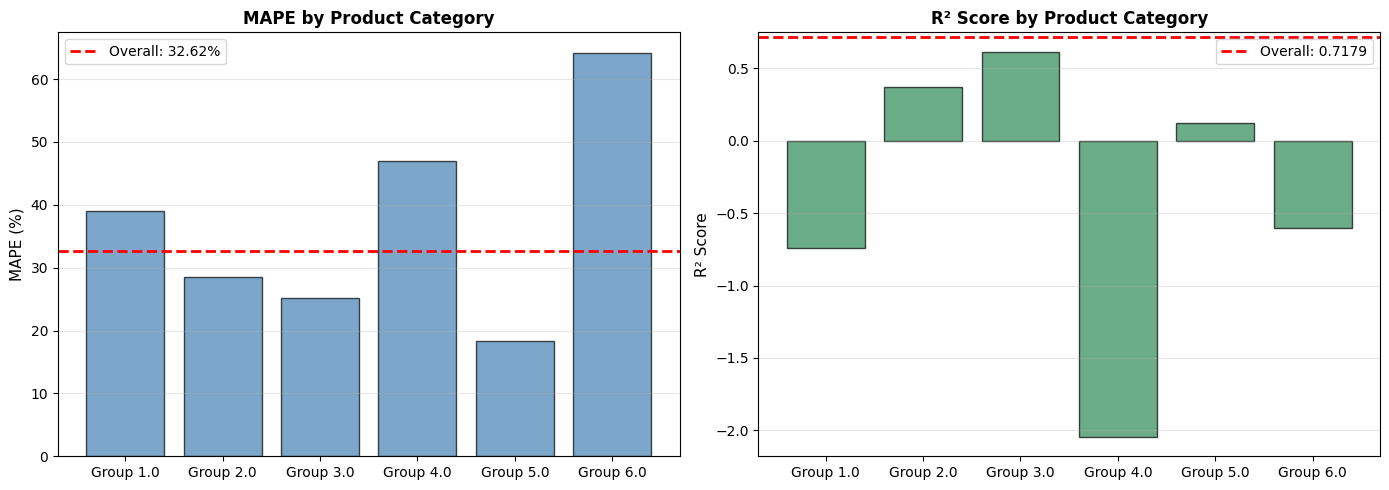


✓ Saved figure: advanced_lr_mape_by_category.png

💡 Insights:
   Best performing: Group 5.0 (MAPE: 18.37%)
   Worst performing: Group 6.0 (MAPE: 64.22%)
   MAPE spread: 45.85% difference


In [65]:
print("="*80)
print("MAPE BY PRODUCT CATEGORY (WARENGRUPPE)")
print("="*80)

if 'val_time' in locals() and 'Warengruppe' in val_time.columns:
    # Create a DataFrame with actual, predicted, and product group
    results_df = pd.DataFrame({
        'actual': y_val_time.values,
        'predicted': y_val_pred_time,
        'warengruppe': val_time['Warengruppe'].values
    })
    
    # Calculate MAPE for each product category
    category_mape = {}
    category_counts = {}
    category_mae = {}
    category_r2 = {}
    
    print("\nMAPE by Product Category:\n")
    print(f"{'Category':<12} {'Count':<8} {'MAPE':<10} {'MAE':<12} {'R²':<10}")
    print("-" * 60)
    
    for category in sorted(results_df['warengruppe'].unique()):
        cat_data = results_df[results_df['warengruppe'] == category]
        
        # Calculate metrics
        mape = calculate_mape(cat_data['actual'], cat_data['predicted'])
        mae = mean_absolute_error(cat_data['actual'], cat_data['predicted'])
        r2 = r2_score(cat_data['actual'], cat_data['predicted'])
        count = len(cat_data)
        
        category_mape[category] = mape
        category_counts[category] = count
        category_mae[category] = mae
        category_r2[category] = r2
        
        print(f"Group {category:<6} {count:<8} {mape:>6.2f}%    €{mae:>8,.2f}   {r2:>7.4f}")
    
    print("-" * 60)
    print(f"{'Overall':<12} {len(results_df):<8} {time_mape:>6.2f}%    €{time_mae:>8,.2f}   {time_r2:>7.4f}")
    
    # Visualize MAPE by category
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart of MAPE by category
    categories = sorted(category_mape.keys())
    mapes = [category_mape[cat] for cat in categories]
    
    axes[0].bar(range(len(categories)), mapes, color='steelblue', alpha=0.7, edgecolor='black')
    axes[0].axhline(y=time_mape, color='red', linestyle='--', linewidth=2, label=f'Overall: {time_mape:.2f}%')
    axes[0].set_xticks(range(len(categories)))
    axes[0].set_xticklabels([f'Group {cat}' for cat in categories], rotation=0)
    axes[0].set_ylabel('MAPE (%)', fontsize=11)
    axes[0].set_title('MAPE by Product Category', fontsize=12, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Bar chart of R² by category
    r2_values = [category_r2[cat] for cat in categories]
    
    axes[1].bar(range(len(categories)), r2_values, color='seagreen', alpha=0.7, edgecolor='black')
    axes[1].axhline(y=time_r2, color='red', linestyle='--', linewidth=2, label=f'Overall: {time_r2:.4f}')
    axes[1].set_xticks(range(len(categories)))
    axes[1].set_xticklabels([f'Group {cat}' for cat in categories], rotation=0)
    axes[1].set_ylabel('R² Score', fontsize=11)
    axes[1].set_title('R² Score by Product Category', fontsize=12, fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('advanced_lr_mape_by_category.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Saved figure: advanced_lr_mape_by_category.png")
    
    # Identify best and worst performing categories
    best_cat = min(category_mape.keys(), key=lambda x: category_mape[x])
    worst_cat = max(category_mape.keys(), key=lambda x: category_mape[x])
    
    print(f"\n💡 Insights:")
    print(f"   Best performing: Group {best_cat} (MAPE: {category_mape[best_cat]:.2f}%)")
    print(f"   Worst performing: Group {worst_cat} (MAPE: {category_mape[worst_cat]:.2f}%)")
    print(f"   MAPE spread: {category_mape[worst_cat] - category_mape[best_cat]:.2f}% difference")
else:
    print("Product category information not available in validation data.")

---
## 18. Strategy: Simple Blending (Ensemble)

Blend baseline with other variants (interactions, time features, polynomial) to see if a weighted average improves validation R².

In [66]:
print("="*80)
print("STRATEGY: Simple Blending")
print("="*80)

# Collect validation predictions
candidates = {}

# Baseline (required)
try:
    baseline_val = y_val_pred_baseline
    baseline_test = lr_baseline.predict(X_test)
    candidates['baseline'] = {
        'val': baseline_val,
        'test': baseline_test
    }
except Exception as e:
    print("Baseline predictions missing; cannot blend")

# Interactions
if 'y_val_pred_interact' in locals() and 'lr_interact' in locals():
    try:
        candidates['interact'] = {
            'val': y_val_pred_interact,
            'test': lr_interact.predict(X_test_interact)
        }
    except Exception:
        pass

# Polynomial
if 'y_val_pred_poly' in locals() and 'lr_poly' in locals():
    try:
        candidates['poly'] = {
            'val': y_val_pred_poly,
            'test': lr_poly.predict(X_test_poly_full)
        }
    except Exception:
        pass

# Time/Group
if 'y_val_pred_time' in locals() and 'lr_time' in locals():
    try:
        candidates['time'] = {
            'val': y_val_pred_time,
            'test': test_predictions_time
        }
    except Exception:
        pass

if len(candidates) < 2:
    print("Not enough models to blend; need at least baseline + 1 other model")
else:
    weights = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
    best = {
        'r2': val_r2_baseline,
        'mape': val_mape_baseline,
        'mae': val_mae_baseline,
        'name': 'baseline',
        'weight': 0,
        'partner': None
    }
    
    for name, preds in candidates.items():
        if name == 'baseline':
            continue
        for w in weights:
            blend_val = w * preds['val'] + (1 - w) * candidates['baseline']['val']
            r2 = r2_score(y_val, blend_val)
            mape = calculate_mape(y_val, blend_val)
            mae = mean_absolute_error(y_val, blend_val)
            if r2 > best['r2']:
                best = {
                    'r2': r2,
                    'mape': mape,
                    'mae': mae,
                    'name': name,
                    'weight': w,
                    'partner': 'baseline'
                }
    
    print(f"\nBest blend candidate: {best['partner']} + {best['name']} (weight on {best['name']}: {best['weight']:.1f})")
    print(f"   R²: {best['r2']:.4f} (baseline: {val_r2_baseline:.4f})")
    print(f"   MAPE: {best['mape']:.2f}% (baseline: {val_mape_baseline:.2f}%)")
    print(f"   MAE: €{best['mae']:.2f} (baseline: €{val_mae_baseline:.2f})")
    
    if best['r2'] > val_r2_baseline:
        test_pred_blend = best['weight'] * candidates[best['name']]['test'] + (1 - best['weight']) * candidates['baseline']['test']
        test_with_ids = pd.read_csv('/workspaces/Room_7_Bakery_Prediction/0_DataPreparation/0.6 Merge with test dataset and split/test_data.csv')
        submission_blend = pd.DataFrame({
            'id': test_with_ids['id'].values,
            'umsatz': test_pred_blend
        })
        submission_blend.to_csv('advanced_lr_predictions_blend.csv', index=False)
        print(f"\n🎉 Improvement via blend! Saved: advanced_lr_predictions_blend.csv")
    else:
        print("\n⚠️  Blending did not beat baseline")

STRATEGY: Simple Blending

Best blend candidate: baseline + time (weight on time: 0.8)
   R²: 0.7173 (baseline: 0.7139)
   MAPE: 32.63% (baseline: 32.76%)
   MAE: €49.11 (baseline: €49.55)

🎉 Improvement via blend! Saved: advanced_lr_predictions_blend.csv


---
## 19. Fine-Grained Blend: Time Model + Baseline

Search finer weights between the strong time model and baseline to squeeze a small lift.

In [67]:
print("="*80)
print("FINE BLEND: Time + Baseline")
print("="*80)

if 'y_val_pred_time' not in locals() or 'test_predictions_time' not in locals():
    print("Time model predictions not available; run the time strategy cell first.")
elif 'y_val_pred_baseline' not in locals():
    print("Baseline predictions not available; run baseline cell first.")
else:
    weights = np.linspace(0, 1, 21)  # 0.0 to 1.0 step 0.05
    best = {
        'r2': time_r2,
        'mape': time_mape,
        'mae': time_mae,
        'w': 1.0  # weight on time model
    }
    
    for w in weights:
        blend_val = w * y_val_pred_time + (1 - w) * y_val_pred_baseline
        r2 = r2_score(y_val, blend_val)
        mape = calculate_mape(y_val, blend_val)
        mae = mean_absolute_error(y_val, blend_val)
        if r2 > best['r2']:
            best = {
                'r2': r2,
                'mape': mape,
                'mae': mae,
                'w': w
            }
    
    print(f"Best validation R²: {best['r2']:.4f} (time alone: {time_r2:.4f}, baseline: {val_r2_baseline:.4f})")
    print(f"Best weight on time model: {best['w']:.2f}")
    print(f"MAPE: {best['mape']:.2f}% (time: {time_mape:.2f}%, baseline: {val_mape_baseline:.2f}%)")
    print(f"MAE:  €{best['mae']:.2f} (time: €{time_mae:.2f}, baseline: €{val_mae_baseline:.2f})")
    
    if best['r2'] > time_r2:
        # Blend test predictions with same weight
        test_with_ids = pd.read_csv('/workspaces/Room_7_Bakery_Prediction/0_DataPreparation/0.6 Merge with test dataset and split/test_data.csv')
        test_pred_blend = best['w'] * test_predictions_time + (1 - best['w']) * lr_baseline.predict(X_test)
        submission_time_blend = pd.DataFrame({
            'id': test_with_ids['id'].values,
            'umsatz': test_pred_blend
        })
        submission_time_blend.to_csv('advanced_lr_predictions_time_blend.csv', index=False)
        print(f"\n🎉 Improvement over time model! Saved: advanced_lr_predictions_time_blend.csv")
        print(f"Submit this if validation lift is solid.")
    else:
        print("\nBlend did not beat the time model; keep the time submission.")

FINE BLEND: Time + Baseline
Best validation R²: 0.7179 (time alone: 0.7179, baseline: 0.7139)
Best weight on time model: 1.00
MAPE: 32.62% (time: 32.62%, baseline: 32.76%)
MAE:  €49.02 (time: €49.02, baseline: €49.55)

Blend did not beat the time model; keep the time submission.


---
## 20. Time Model Tweaks: Winsor Relax + Group Bias

Two quick tweaks on top of the time model:
- Relax winsorization upper tail (99.7%)
- Per-Warengruppe residual bias correction

Run in order; each saves a CSV only if validation improves.

In [68]:
print("="*80)
print("TIME MODEL TWEAK 1: Relax Winsor Upper Tail (99.7%)")
print("="*80)

# Rebuild time features with slightly relaxed clipping
def build_time_data(upper_clip=99.7):
    t_train = train_data.copy()
    t_val = val_data.copy()
    t_test = test_data.copy()
    
    # time feats
    pi = np.pi
    for df in [t_train, t_val, t_test]:
        df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)
        df['week_sin'] = np.sin(2 * pi * df['weekofyear'] / 52)
        df['week_cos'] = np.cos(2 * pi * df['weekofyear'] / 52)
        df['quarter'] = df['date'].dt.quarter
    
    # school holiday flag if available
    school_cols = [c for c in ['SchoolHoliday', 'School_Holiday', 'school_holiday'] if c in t_train.columns]
    if school_cols:
        school_col = school_cols[0]
        def to_flag(series):
            if series.dtype in ['int64', 'float64']:
                return series.fillna(0).astype(int).clip(0, 1)
            return series.fillna('0').apply(lambda x: 1 if str(x) in ['1', 'True', 'true'] else 0)
        for df in [t_train, t_val, t_test]:
            df['school_holiday_flag'] = to_flag(df[school_col])
    elif 'Is_Holiday' in t_train.columns:
        for df in [t_train, t_val, t_test]:
            df['school_holiday_flag'] = df['Is_Holiday'].apply(lambda x: 1 if x in [1, True, '1'] else 0)
    
    # Warengruppe mean target encoding
    if 'Warengruppe' in t_train.columns:
        wg_mean = t_train.groupby('Warengruppe')['umsatz'].mean()
        global_mean = t_train['umsatz'].mean()
        for df in [t_train, t_val, t_test]:
            df['warengruppe_mean_sales'] = df['Warengruppe'].map(wg_mean).fillna(global_mean)
    else:
        global_mean = t_train['umsatz'].mean()
        for df in [t_train, t_val, t_test]:
            df['warengruppe_mean_sales'] = global_mean
    
    extra_numeric = ['week_sin', 'week_cos', 'quarter', 'warengruppe_mean_sales']
    if 'school_holiday_flag' in t_train.columns:
        extra_numeric.append('school_holiday_flag')
    
    time_numeric = [c for c in core_numeric + extra_numeric if c in t_train.columns]
    time_categorical = [c for c in core_categorical if c in t_train.columns]
    core_cols_time = time_numeric + time_categorical + ['umsatz', 'date']
    t_train_sub = t_train[[c for c in core_cols_time if c in t_train.columns]].copy()
    t_val_sub = t_val[[c for c in core_cols_time if c in t_val.columns]].copy()
    t_test_sub = t_test[[c for c in core_cols_time if c in t_test.columns]].copy()
    
    # encoding
    exclude_cols = ['date', 'umsatz']
    cat_cols_time = [c for c in time_categorical if c in t_train_sub.columns]
    all_time = pd.concat([t_train_sub, t_val_sub, t_test_sub], ignore_index=True)
    all_time_enc = pd.get_dummies(all_time, columns=cat_cols_time, drop_first=True, dtype=int)
    
    t_train_enc = all_time_enc.iloc[:len(t_train_sub)].copy()
    t_val_enc = all_time_enc.iloc[len(t_train_sub):len(t_train_sub)+len(t_val_sub)].copy()
    t_test_enc = all_time_enc.iloc[len(t_train_sub)+len(t_val_sub):].copy()
    
    feature_cols_time = [col for col in t_train_enc.columns if col not in exclude_cols]
    X_tr = t_train_enc[feature_cols_time].fillna(0)
    X_va = t_val_enc[feature_cols_time].fillna(0)
    X_te = t_test_enc[feature_cols_time].fillna(0)
    y_tr = t_train_enc['umsatz']
    y_va = t_val_enc['umsatz']
    
    # winsor target
    p_low, p_high = np.percentile(y_tr, [0.5, upper_clip])
    y_tr_clip = y_tr.clip(p_low, p_high)
    
    return X_tr, y_tr_clip, X_va, y_va, X_te

# Build with relaxed upper clip
X_tr_r, y_tr_r, X_va_r, y_va_r, X_te_r = build_time_data(upper_clip=99.7)

lr_time_relaxed = LinearRegression()
lr_time_relaxed.fit(X_tr_r, y_tr_r)

y_va_pred_r = lr_time_relaxed.predict(X_va_r)

time_r_mape = calculate_mape(y_va_r, y_va_pred_r)
time_r_r2 = r2_score(y_va_r, y_va_pred_r)
time_r_mae = mean_absolute_error(y_va_r, y_va_pred_r)

print(f"Validation R²: {time_r_r2:.4f} (time model: {time_r2:.4f})")
print(f"MAPE: {time_r_mape:.2f}% (time model: {time_mape:.2f}%)")
print(f"MAE:  €{time_r_mae:.2f} (time model: €{time_mae:.2f})")

if time_r_r2 > time_r2:
    test_with_ids = pd.read_csv('/workspaces/Room_7_Bakery_Prediction/0_DataPreparation/0.6 Merge with test dataset and split/test_data.csv')
    test_pred_r = lr_time_relaxed.predict(X_te_r)
    submission_time_relaxed = pd.DataFrame({
        'id': test_with_ids['id'].values,
        'umsatz': test_pred_r
    })
    submission_time_relaxed.to_csv('advanced_lr_predictions_time_relaxed.csv', index=False)
    print("\n🎉 Improvement! Saved: advanced_lr_predictions_time_relaxed.csv")
else:
    print("\nNo gain vs time model; keep existing best.")

TIME MODEL TWEAK 1: Relax Winsor Upper Tail (99.7%)
Validation R²: 0.7169 (time model: 0.7179)
MAPE: 32.74% (time model: 32.62%)
MAE:  €49.16 (time model: €49.02)

No gain vs time model; keep existing best.


---
## 21. Time Model Bias Correction per Warengruppe

Adjust time-model predictions by adding back mean residual per Warengruppe (computed on validation).

In [69]:
print("="*80)
print("TIME MODEL TWEAK 2: Per-Warengruppe Bias Correction")
print("="*80)

if 'y_val_pred_time' not in locals() or 'y_val_time' not in locals() or 'val_time' not in locals():
    print("Time model outputs not available; run the time model cell first.")
elif 'Warengruppe' not in val_time.columns:
    print("Warengruppe not in validation data; skipping bias correction.")
else:
    # Compute residuals on validation
    val_residuals = y_val_time - y_val_pred_time
    grp_bias = val_time.groupby('Warengruppe').apply(lambda df: val_residuals[df.index].mean())
    global_bias = val_residuals.mean()
    
    # Apply bias to validation preds
    bias_series_val = val_time['Warengruppe'].map(grp_bias).fillna(global_bias)
    y_val_pred_bias = y_val_pred_time + bias_series_val.values
    
    r2_bias = r2_score(y_val_time, y_val_pred_bias)
    mape_bias = calculate_mape(y_val_time, y_val_pred_bias)
    mae_bias = mean_absolute_error(y_val_time, y_val_pred_bias)
    
    print(f"Validation R² (bias-corrected): {r2_bias:.4f} vs time model {time_r2:.4f}")
    print(f"MAPE: {mape_bias:.2f}% vs {time_mape:.2f}%")
    print(f"MAE:  €{mae_bias:.2f} vs €{time_mae:.2f}")
    
    if r2_bias > time_r2:
        # Apply to test preds
        if 'test_predictions_time' in locals():
            test_with_ids = pd.read_csv('/workspaces/Room_7_Bakery_Prediction/0_DataPreparation/0.6 Merge with test dataset and split/test_data.csv')
            bias_series_test = test_time['Warengruppe'].map(grp_bias).fillna(global_bias)
            test_pred_bias = test_predictions_time + bias_series_test.values
            submission_time_bias = pd.DataFrame({
                'id': test_with_ids['id'].values,
                'umsatz': test_pred_bias
            })
            submission_time_bias.to_csv('advanced_lr_predictions_time_bias.csv', index=False)
            print("\n🎉 Improvement! Saved: advanced_lr_predictions_time_bias.csv")
        else:
            print("Test predictions from time model not found; rerun time model cell first.")
    else:
        print("\nBias correction did not beat the time model; keep existing best.")

TIME MODEL TWEAK 2: Per-Warengruppe Bias Correction
Validation R² (bias-corrected): 0.7233 vs time model 0.7179
MAPE: 31.36% vs 32.62%
MAE:  €48.18 vs €49.02

🎉 Improvement! Saved: advanced_lr_predictions_time_bias.csv


---
## 21.1 MAPE by Product Category (Bias-Corrected)

Assess model performance across product categories using the bias-corrected predictions (`y_val_pred_bias`).

MAPE BY PRODUCT CATEGORY (Bias-Corrected)

MAPE by Product Category:

Category     Count    MAPE       MAE          R²        
------------------------------------------------------------
Group 1.0    357       40.03%    €   44.38   -0.8294
Group 2.0    357       26.44%    €   81.87    0.4221
Group 3.0    357       19.87%    €   32.43    0.6053
Group 4.0    357       48.49%    €   39.38   -2.2088
Group 5.0    357       16.71%    €   43.54    0.1503
Group 6.0    56        64.77%    €   43.86   -2.1005
------------------------------------------------------------
Overall      1841      31.36%    €   48.18    0.7233


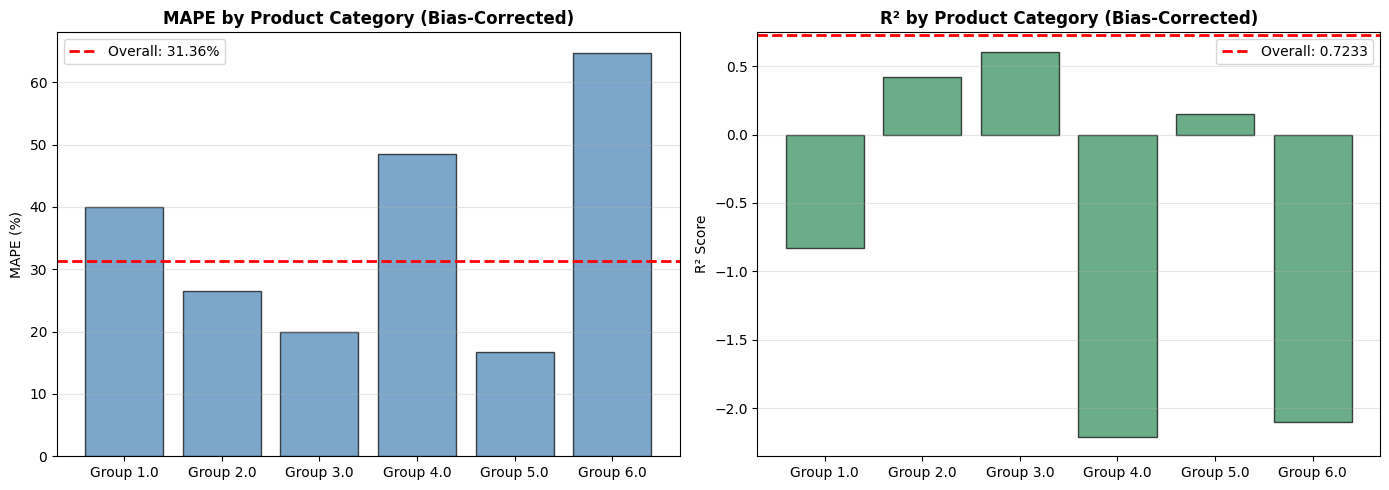


✓ Saved figure: advanced_lr_mape_by_category_bias.png

💡 Insights:
   Best:  Group 5.0 (MAPE: 16.71%)
   Worst: Group 6.0 (MAPE: 64.77%)
   Spread: 48.06%


In [70]:
print("="*80)
print("MAPE BY PRODUCT CATEGORY (Bias-Corrected)")
print("="*80)

# Requires: y_val_pred_bias, y_val_time, val_time with 'Warengruppe'
if 'y_val_pred_bias' in locals() and 'y_val_time' in locals() and 'val_time' in locals() and 'Warengruppe' in val_time.columns:
    results_df = pd.DataFrame({
        'actual': y_val_time.values,
        'predicted': y_val_pred_bias,
        'warengruppe': val_time['Warengruppe'].values
    })

    category_mape = {}
    category_mae = {}
    category_r2 = {}
    category_counts = {}

    print("\nMAPE by Product Category:\n")
    print(f"{'Category':<12} {'Count':<8} {'MAPE':<10} {'MAE':<12} {'R²':<10}")
    print("-" * 60)

    for category in sorted(results_df['warengruppe'].unique()):
        cat = results_df[results_df['warengruppe'] == category]
        mape = calculate_mape(cat['actual'], cat['predicted'])
        mae = mean_absolute_error(cat['actual'], cat['predicted'])
        r2 = r2_score(cat['actual'], cat['predicted'])
        count = len(cat)

        category_mape[category] = mape
        category_mae[category] = mae
        category_r2[category] = r2
        category_counts[category] = count

        print(f"Group {category:<6} {count:<8} {mape:>6.2f}%    €{mae:>8,.2f}   {r2:>7.4f}")

    # If overall bias-corrected metrics exist, print a summary line
    overall_mape = 'mape_bias' in locals() and isinstance(mape_bias, (int,float))
    overall_r2 = 'r2_bias' in locals() and isinstance(r2_bias, (int,float))
    overall_mae = 'mae_bias' in locals() and isinstance(mae_bias, (int,float))

    print("-" * 60)
    if overall_mape and overall_r2 and overall_mae:
        print(f"{'Overall':<12} {len(results_df):<8} {mape_bias:>6.2f}%    €{mae_bias:>8,.2f}   {r2_bias:>7.4f}")
    else:
        # Fallback: compute overall from results_df
        mape_overall = calculate_mape(results_df['actual'], results_df['predicted'])
        mae_overall = mean_absolute_error(results_df['actual'], results_df['predicted'])
        r2_overall = r2_score(results_df['actual'], results_df['predicted'])
        print(f"{'Overall':<12} {len(results_df):<8} {mape_overall:>6.2f}%    €{mae_overall:>8,.2f}   {r2_overall:>7.4f}")

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    categories = sorted(category_mape.keys())
    mapes = [category_mape[c] for c in categories]
    r2_vals = [category_r2[c] for c in categories]

    # MAPE bar
    axes[0].bar(range(len(categories)), mapes, color='steelblue', alpha=0.7, edgecolor='black')
    axes[0].set_xticks(range(len(categories)))
    axes[0].set_xticklabels([f'Group {c}' for c in categories])
    axes[0].set_ylabel('MAPE (%)')
    axes[0].set_title('MAPE by Product Category (Bias-Corrected)', fontsize=12, fontweight='bold')
    axes[0].grid(True, alpha=0.3, axis='y')
    if overall_mape:
        axes[0].axhline(y=mape_bias, color='red', linestyle='--', linewidth=2, label=f'Overall: {mape_bias:.2f}%')
        axes[0].legend()

    # R² bar
    axes[1].bar(range(len(categories)), r2_vals, color='seagreen', alpha=0.7, edgecolor='black')
    axes[1].set_xticks(range(len(categories)))
    axes[1].set_xticklabels([f'Group {c}' for c in categories])
    axes[1].set_ylabel('R² Score')
    axes[1].set_title('R² by Product Category (Bias-Corrected)', fontsize=12, fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='y')
    if overall_r2:
        axes[1].axhline(y=r2_bias, color='red', linestyle='--', linewidth=2, label=f'Overall: {r2_bias:.4f}')
        axes[1].legend()

    plt.tight_layout()
    plt.savefig('advanced_lr_mape_by_category_bias.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n✓ Saved figure: advanced_lr_mape_by_category_bias.png")

    # Insights
    best_cat = min(categories, key=lambda x: category_mape[x])
    worst_cat = max(categories, key=lambda x: category_mape[x])
    print(f"\n💡 Insights:")
    print(f"   Best:  Group {best_cat} (MAPE: {category_mape[best_cat]:.2f}%)")
    print(f"   Worst: Group {worst_cat} (MAPE: {category_mape[worst_cat]:.2f}%)")
    print(f"   Spread: {category_mape[worst_cat] - category_mape[best_cat]:.2f}%")
else:
    print("Bias-corrected predictions or category data missing; run section 21 first.")

---
## 22. Visualize Time Model (Train/Validation)

Diagnostic plots similar to the Random Forest results: predicted vs actual (train/val), residuals, and residual histogram.

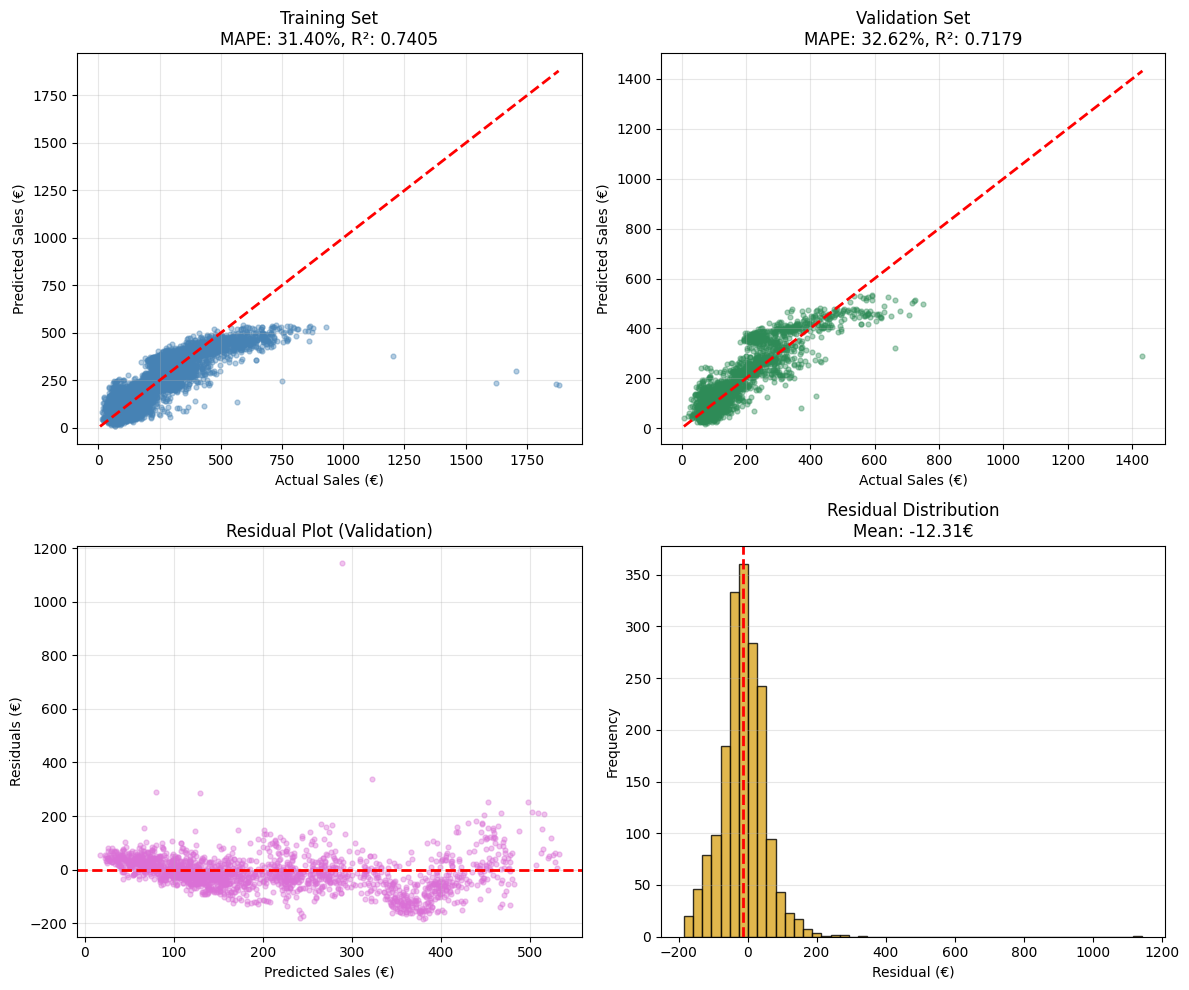

✓ Saved figure: advanced_lr_time_model_results.png


In [71]:
# Ensure time model artifacts exist
if 'lr_time' not in locals() or 'X_train_time' not in locals() or 'X_val_time' not in locals():
    print("Time model not found. Run the time model cell first.")
else:
    # Actuals
    y_train_actual = train_time['umsatz'] if 'train_time' in locals() else y_train_time
    y_val_actual = y_val_time
    
    # Predictions
    y_train_pred = lr_time.predict(X_train_time)
    y_val_pred = y_val_pred_time
    
    # Metrics
    mape_train = calculate_mape(y_train_actual, y_train_pred)
    r2_train = r2_score(y_train_actual, y_train_pred)
    mape_val = calculate_mape(y_val_actual, y_val_pred)
    r2_val = r2_score(y_val_actual, y_val_pred)
    residuals_val = y_val_actual - y_val_pred
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Train: Pred vs Actual
    axes[0, 0].scatter(y_train_actual, y_train_pred, alpha=0.4, s=12, color='steelblue')
    diag_min, diag_max = min(y_train_actual.min(), y_train_pred.min()), max(y_train_actual.max(), y_train_pred.max())
    axes[0, 0].plot([diag_min, diag_max], [diag_min, diag_max], 'r--', lw=2)
    axes[0, 0].set_title(f"Training Set\nMAPE: {mape_train:.2f}%, R²: {r2_train:.4f}")
    axes[0, 0].set_xlabel('Actual Sales (€)')
    axes[0, 0].set_ylabel('Predicted Sales (€)')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Validation: Pred vs Actual
    axes[0, 1].scatter(y_val_actual, y_val_pred, alpha=0.4, s=12, color='seagreen')
    diag_min, diag_max = min(y_val_actual.min(), y_val_pred.min()), max(y_val_actual.max(), y_val_pred.max())
    axes[0, 1].plot([diag_min, diag_max], [diag_min, diag_max], 'r--', lw=2)
    axes[0, 1].set_title(f"Validation Set\nMAPE: {mape_val:.2f}%, R²: {r2_val:.4f}")
    axes[0, 1].set_xlabel('Actual Sales (€)')
    axes[0, 1].set_ylabel('Predicted Sales (€)')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Residuals scatter (Validation)
    axes[1, 0].scatter(y_val_pred, residuals_val, alpha=0.4, s=12, color='orchid')
    axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[1, 0].set_xlabel('Predicted Sales (€)')
    axes[1, 0].set_ylabel('Residuals (€)')
    axes[1, 0].set_title('Residual Plot (Validation)')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Residual histogram (Validation)
    axes[1, 1].hist(residuals_val, bins=50, color='goldenrod', alpha=0.8, edgecolor='black')
    axes[1, 1].axvline(x=residuals_val.mean(), color='r', linestyle='--', lw=2)
    axes[1, 1].set_title(f"Residual Distribution\nMean: {residuals_val.mean():.2f}€")
    axes[1, 1].set_xlabel('Residual (€)')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].grid(True, axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('advanced_lr_time_model_results.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Saved figure: advanced_lr_time_model_results.png")